In [1]:
#https://pypi.org/project/pyEDFlib/
import sys, os
sys.path.append(os.path.realpath("/home/saqibm128/miniconda3/envs/keras/lib/python3.7/site-packages"))
import pandas as pd
import numpy as np
import pyedflib as edf
import matplotlib.pyplot as plt
import util_funcs
import data_reader as read
from importlib import reload
import pickle as pkl

In [2]:
data = pkl.load(open("../dev_test_01_tcp_ar_fft.pkl", 'rb'))

In [4]:
train_data = pkl.load(open("/mnt/c/Users/sawer/src/dbmi/train_01_tcp_ar_fft.pkl", 'rb'))

In [14]:
cols = [set(train_data[i][0].columns) for i in range(len(train_data))]
len(cols[0].intersection(*cols))

21

In [49]:
data[100][0].index 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98],
           dtype='int64')

In [57]:
read.expand_tse_file(data[100][1], pd.Series(list(range(int(data[100][1].end.max())))) * pd.Timedelta(seconds=1) )

,null,spsw,gped,pled,eybl,artf,bckg,seiz,fnsz,gnsz,...,mysz,nesz,intr,slow,eyem,chew,shiv,musc,elpp,elst
00:00:00,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:01,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:02,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:03,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:04,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:05,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:06,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:07,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:08,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
00:00:09,0,0,0,0,0,0,1.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
pd.Series(list(range(int(data[100][1].end.max())))) * pd.Timedelta(seconds=1)

0     00:00:00
1     00:00:01
2     00:00:02
3     00:00:03
4     00:00:04
5     00:00:05
6     00:00:06
7     00:00:07
8     00:00:08
9     00:00:09
10    00:00:10
11    00:00:11
12    00:00:12
13    00:00:13
14    00:00:14
15    00:00:15
16    00:00:16
17    00:00:17
18    00:00:18
19    00:00:19
20    00:00:20
21    00:00:21
22    00:00:22
23    00:00:23
24    00:00:24
25    00:00:25
26    00:00:26
27    00:00:27
28    00:00:28
29    00:00:29
        ...   
571   00:09:31
572   00:09:32
573   00:09:33
574   00:09:34
575   00:09:35
576   00:09:36
577   00:09:37
578   00:09:38
579   00:09:39
580   00:09:40
581   00:09:41
582   00:09:42
583   00:09:43
584   00:09:44
585   00:09:45
586   00:09:46
587   00:09:47
588   00:09:48
589   00:09:49
590   00:09:50
591   00:09:51
592   00:09:52
593   00:09:53
594   00:09:54
595   00:09:55
596   00:09:56
597   00:09:57
598   00:09:58
599   00:09:59
600   00:10:00
Length: 601, dtype: timedelta64[ns]

In [46]:
y = data[100][1]
y = pd.DataFrame([(y.end - y.start) * y.p, y.label]).T.groupby("label").sum()
y = y/y.sum()
y = y[y.columns[0]]
for ann_type in util_funcs.get_annotation_types():
    if ann_type not in y.index:
        y[ann_type] = 0
y


label
bckg    0.809523
fnsz    0.190477
null    0.000000
spsw    0.000000
gped    0.000000
pled    0.000000
eybl    0.000000
artf    0.000000
seiz    0.000000
gnsz    0.000000
spsz    0.000000
cpsz    0.000000
absz    0.000000
tnsz    0.000000
cnsz    0.000000
tcsz    0.000000
atsz    0.000000
mysz    0.000000
nesz    0.000000
intr    0.000000
slow    0.000000
eyem    0.000000
chew    0.000000
shiv    0.000000
musc    0.000000
elpp    0.000000
elst    0.000000
Name: Unnamed 0, dtype: float64

In [2]:
reload(read)
edf_data_paths = read.get_all_token_file_names('dev_test', "01_tcp_ar")
# data, ann = read.get_edf_data_and_label_ts_format(edf_data_paths[0])

In [7]:
edf_data = read.EdfDataset('dev_test', '01_tcp_ar')

In [4]:
edf_data[0]

(                 EEG FP1-REF  EEG FP2-REF  EEG F3-REF  EEG F4-REF  EEG C3-REF  \
 00:00:00           30.602539    77.391129   16.206050   70.192885    4.508903   
 00:00:00.003906    22.504514    68.393323    7.208245   65.693982   -0.889781   
 00:00:00.007812    18.905392    62.994640   14.406489   65.693982    0.010000   
 00:00:00.011718    14.406489    59.395518   11.707147   63.894421   -8.088025   
 00:00:00.015624    21.604734    66.593762    9.007806   73.792007    4.508903   
 00:00:00.019530    19.805173    63.894421   11.707147   74.691787    2.709342   
 00:00:00.023436    13.506709    53.996834    5.408683   71.992446    0.010000   
 00:00:00.027342     9.907586    53.097054    4.508903   71.992446   -3.589122   
 00:00:00.031248    17.105831    57.595957    8.108025   77.391129   -0.889781   
 00:00:00.035154    15.306270    54.896615    8.108025   78.290910    0.010000   
 00:00:00.039060     9.007806    51.297493    3.609122   74.691787   -4.488903   
 00:00:00.042966

In [14]:
dp_0 = edf_data[0] #datapoint

In [44]:
dp_1 = edf_data[1]

(69636, 32)

In [23]:
dp_0[0].values.shape

(5120, 32)

In [75]:
original_data = dp_0 #better name

In [77]:
original_data

Index(['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF',
       'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF',
       'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF',
       'EEG T6-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG-REF',
       'EEG A1-REF', 'EEG A2-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG SP1-REF',
       'EEG SP2-REF', 'EEG LUC-REF', 'EEG RLC-REF', 'EEG RESP1-REF',
       'EEG RESP2-REF', 'EEG 31-REF', 'EEG 32-REF'],
      dtype='object')

In [86]:
fft_data = np.abs(np.fft.fft(dp_0[0].values))
fft_freq = np.fft.fftfreq(fft_data.shape[0], d=1/256)
fft_freq_bins = list(range(50))
new_fft_hist = pd.DataFrame(index=fft_freq_bins[:-1], columns=original_data[0].columns)
for i, name in enumerate(original_data[0].columns):
    new_fft_hist[name] = np.histogram(fft_freq, bins=fft_freq_bins, weights=fft_data[:,i])[0]


In [237]:
reload(util_funcs)
reload(read)
edf_data = read.EdfDataset('dev_test', '01_tcp_ar')
fft_data = read.EdfFFTDatasetTransformer(edf_data)

In [239]:
len(fft_data)

897

In [115]:
max_eeg = 20

In [116]:
import time
start = time.time()
data = fft_data[0:max_eeg]
print("benchmark for {} eegs: {}".format(max_eeg, time.time()-start))

benchmark for 20 eegs: 18.021440744400024


In [77]:
#without multiprocessing
import time
start = time.time()
for i in range(20):
    dp = fft_data[i]
print(time.time()-start)

58.31904983520508


In [78]:
#with a pool
reload(read)
start = time.time()
dp = fft_data[0:20]
print(time.time()-start)

53.84441137313843


In [80]:
reload(read)

<module 'data_reader' from '/mnt/c/Users/sawer/src/dbmi/dbmi_eeg_clustering/data_reader.py'>

In [89]:
#with processes
reload(read)
start = time.time()
dp = fft_data[0:20]
print(time.time()-start)

16.787282466888428


In [11]:
from sklearn.decomposition import PCA

In [136]:
pca = PCA(6)

In [137]:
fft_x = [datum[0].values.shape for datum in data]
cols = [set(datum[0].dropna().columns) for datum in data]
common_cols = list(cols[0].intersection(*cols))

In [178]:
pred_y = np.array([datum[1].mean().values for datum in data])

In [138]:
fft_x = np.array([datum[0][common_cols].values for datum in data[0:max_eeg]])

In [139]:
fft_x = fft_x.reshape(max_eeg, -1)

In [141]:
np.isnan(fft_x).any(axis=1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [142]:
pca.fit(fft_x)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[2.16293366e+16 1.45177157e+16 3.31873115e+15 1.30286007e+15
 5.43894810e+14 4.13281807e+14]


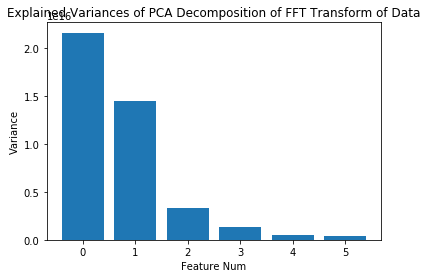

In [143]:
plt.bar([i for i in range(len(pca.explained_variance_))], pca.explained_variance_)
plt.title("Explained Variances of PCA Decomposition of FFT Transform of Data")
plt.ylabel("Variance")
plt.xlabel("Feature Num")
print(pca.explained_variance_)

In [144]:
pca_vects = pca.transform(fft_x)

In [158]:
import scipy.cluster as cluster
from sklearn.cluster import MiniBatchKMeans

In [245]:
kmeans = MiniBatchKMeans(4)
cluster_prop = kmeans.fit_transform(cluster.vq.whiten(pca_vects))
cluster_prop = np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=cluster_prop)
percent_y_per_cluster = pd.DataFrame(pred_y.T @ cluster_prop, index=util_funcs.get_annotation_types())
percent_y_per_cluster = (percent_y_per_cluster.T / percent_y_per_cluster.sum(axis=1)).fillna(0)
percent_y_per_cluster

,null,spsw,gped,pled,eybl,artf,bckg,seiz,fnsz,gnsz,...,mysz,nesz,intr,slow,eyem,chew,shiv,musc,elpp,elst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.269698,0.0,0.155446,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.168365,0.0,0.272620,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.385120,0.0,0.382500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.176817,0.0,0.189434,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
pca_vects.shape

(20, 6)

In [38]:
range(*slice(1,5).indices(100000000))

range(1, 5)